In [3]:
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    %cd "/content/gdrive/My Drive/Projects"
    !git clone https://github.com/ai357060/modelF.git
    import sys
    root_dir="/content/gdrive/My Drive/Projects/modelF"
    sys.path.append(root_dir)
    %cd "/content/gdrive/My Drive/Projects/modelF/wm"
    !git fetch --all
    !git reset --hard origin/master

In [4]:
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    %cd "/content/gdrive/My Drive/Projects"
#     !git clone https://github.com/ai357060/modelF.git
    import sys
    root_dir="/content/gdrive/My Drive/Projects/modelF"
    sys.path.append(root_dir)
    %cd "/content/gdrive/My Drive/Projects/modelF/wm"
#     !git pull

In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
import pandas as pd
import numpy as np
import datetime as dt
import importlib
import tradestats
import pandas as pd
from datetime import datetime
importlib.reload(tradestats)
from tradestats import *

In [7]:
prices = loaddata_1D('AUDUSD_Candlestick_1_D_BID_03.08.2003-24.10.2021.csv')
# prices = loaddata_1D('EURUSD_Candlestick_1_D_BID_03.08.2003-24.10.2021.csv')

In [8]:
len(prices)

4753

In [9]:
dictList = []
colFeat = []
keyList = []

maKey  = [3,5,7,30,35,40,45,60,80,100,120,140,160,200]
atrKey = [20]
# srsKey = [0]
rsiKey = [15]

maDict   = ma2(prices, maKey,3,5,7)
atrDict  = atr(prices, atrKey)
# srsDict  = srs(prices, srsKey)
rsiDict = rsi(prices,rsiKey)

dictList.append(maDict.df); colFeat.append('ma'); keyList.append(maKey) 
dictList.append(atrDict.df); colFeat.append('atr'); keyList.append(atrKey) 
# dictList.append(srsDict.df); colFeat.append('srs'); keyList.append(srsKey) 
dictList.append(rsiDict.df); colFeat.append('rsi'); keyList.append(rsiKey) 

tt = [1]
sl = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]
tp = [0.7,0.75,0.8,0.85,0.9]
tsl = [0,0.3,0.5,0.7]
atrperiod = 'atr20atr_prev'
savetrades = True

In [10]:
# prices.dropna(inplace=True)
masterFrame = pd.DataFrame(index=prices.index)
masterFrame[['id','year','month','day','date','weekday','open','high','low','close','volume']] = prices[['id','year','month','day','date','weekday','open','high','low','close','volume']]   

In [11]:
for i in range(0,len(dictList)):#iteracja po funkcjach
    for j in keyList[i]: #iteracja po okresach
        for k in list(dictList[i][j]): #iteracja po kolumnach danej funkcji w okresie
            colID = colFeat[i] + str(j) + k
            masterFrame[colID] = dictList[i][j][k]

In [12]:
# masterFrame.to_csv(sep=';',path_or_buf='../Data/masterFrame.csv',date_format="%Y-%m-%d",index = False,na_rep='')

In [13]:
masterFrame = masterFrame.dropna()

In [14]:
starttime = datetime.now()
# alltrades = preparetrades_brut_tsl(masterFrame,[1],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],2015,2021)
# alltrades = preparetrades_brut_tp(masterFrame,[1],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],2003,2021)
# alltrades = preparetrades_brut_tp(masterFrame,[-1,1],[0.5],[0.9],2020,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.3,0.4,0.5,0.6,0.7,0.8,0.9],[0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[1],[1,1.2,1.4,1.6,1.8,2,2.2],[1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.2],2003,2021,atrperiod)
alltrades = preparetrades_brut_tsl(masterFrame,tt,sl,tp+[100],tsl,2003,2021,atrperiod)
# alltrades = preparetrades_brut_tsl(masterFrame,[1],sl,tp,tsl,2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],[0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014,0.015],2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.003,0.004,0.005,0.006,0.007,0.008,0.01,0.012,0.014],[0.003,0.004,0.005,0.006,0.007,0.008,0.01,0.012,0.014],2003,2021,atrperiod)
endtime = datetime.now()
print(str(endtime - starttime))

0.6 : 0.7 : 0 : -12  open: 0
0.6 : 0.7 : 0.3 : -15  open: 1
0.6 : 0.7 : 0.5 : -16  open: 1
0.6 : 0.7 : 0.7 : -28  open: 1
0.6 : 0.75 : 0 : -13  open: 1
0.6 : 0.75 : 0.3 : -15  open: 1
0.6 : 0.75 : 0.5 : -16  open: 1
0.6 : 0.75 : 0.7 : -28  open: 1
0.6 : 0.8 : 0 : -13  open: 1
0.6 : 0.8 : 0.3 : -15  open: 2
0.6 : 0.8 : 0.5 : -16  open: 2
0.6 : 0.8 : 0.7 : -28  open: 2
0.6 : 0.85 : 0 : -13  open: 1
0.6 : 0.85 : 0.3 : -15  open: 2
0.6 : 0.85 : 0.5 : -16  open: 2
0.6 : 0.85 : 0.7 : -28  open: 2
0.6 : 0.9 : 0 : -13  open: 1
0.6 : 0.9 : 0.3 : -15  open: 2
0.6 : 0.9 : 0.5 : -16  open: 2
0.6 : 0.9 : 0.7 : -28  open: 2
0.6 : 100 : 0 : -22  open: 1
0.65 : 0.7 : 0 : -12  open: 0
0.65 : 0.7 : 0.3 : -15  open: 1
0.65 : 0.7 : 0.5 : -16  open: 1
0.65 : 0.7 : 0.7 : -28  open: 1
0.65 : 0.75 : 0 : -13  open: 1
0.65 : 0.75 : 0.3 : -15  open: 1
0.65 : 0.75 : 0.5 : -16  open: 1
0.65 : 0.75 : 0.7 : -28  open: 1
0.65 : 0.8 : 0 : -13  open: 1
0.65 : 0.8 : 0.3 : -15  open: 2
0.65 : 0.8 : 0.5 : -16  open: 2
0.6

In [15]:
trades = cleartrades_brut(alltrades.copy(),savetrades)

trades_len:  668878


In [16]:
def runstats43(alltrades,ma1,atrperiod,sl,tp,tsl,ma2 = 5,fxs=[]):
    ma2=str(ma2)
    stats = runstats_ma_v43(alltrades,'ma'+ma1+'SMAdiffseq_prev', 'ma'+ma1+'SMAdiffdiff_prev', 'ma'+ma1+'SMAvs'+ma2+'_prev', 'ma'+ma2+'SMAdiffseq_prev', 'ma'+ma2+'SMAdiffdiff_prev', 'rsi15rsidiffseq_prev', 'rsi15rsi_prev', atrperiod,sl,tp,tsl,'x1',fxs)

    return stats

def runstats_ma_v43(alltrades,a,b,sv,aa,bb,aaa,bbb,atr='atr140atr_prev',sl=[],tp=[],tsl=[],ff='',fxs=[]):
    conf   = {}
    params = {}
    
    params['tradetype'] = [2,[1]]
    params['sl'] =        [2,sl]
    params['tp'] =        [2,tp]
    params['tsl'] =       [2,tsl]
    params[atr]  =        [3,[-1000],[0.015]]
    params[a]    =        [0,[-5,-1,1,2,3,4],[-1,1,2,3,4,1000]]
#     params[b]    =        [0,[-1000,0,1000],[-1000,0,1000]]
    params[sv]    =       [0,[-1000,0,1000],[-1000,0,1000]]
#     params[aa]   =        [0,[-1000,0,1000],[-1000,0,1000]]
    params[bb]   =        [0,[-1000,0,1000],[-1000,0,1000]]
    params[aaa]    =      [0,[-5,-1,1,2,3,4],[-1,1,2,3,4,1000]]
    params[bbb]    =      [0,[0,30,40,50,60,70],[30,40,50,60,70,100]]

    conf['filename'] =    'ma_43_2003_2021_1_'+atr+'_'+sv+ff
    if (fxs!=[]):
        conf['fxs'] = fxs
    print(conf['filename'])
    stats = stathyperparams2(alltrades,params,conf)
    return stats

In [ ]:
runstats43(alltrades,'30',atrperiod,sl,tp,tsl,5)
runstats43(alltrades,'35',atrperiod,sl,tp,tsl,5)
runstats43(alltrades,'40',atrperiod,sl,tp,tsl,5)
runstats43(alltrades,'45',atrperiod,sl,tp,tsl,5)
runstats43(alltrades,'60',atrperiod,sl,tp,tsl,5)
runstats43(alltrades,'80',atrperiod,sl,tp,tsl,5)
runstats43(alltrades,'100',atrperiod,sl,tp,tsl,5)
runstats43(alltrades,'120',atrperiod,sl,tp,tsl,5)
runstats43(alltrades,'140',atrperiod,sl,tp,tsl,5)
runstats43(alltrades,'160',atrperiod,sl,tp,tsl,5)
    

# [3,5,7,30,35,40,45,60,80,100,120,140,160]

#     stats1 = runstats28(alltrades,'30',atrperiod,sl,tp,tsl)
#     stats1 = runstats28(alltrades,'40',atrperiod,sl,tp,tsl)
#     stats1 = runstats28(alltrades,'50',atrperiod,sl,tp,tsl)

#     stats1 = runstats28(alltrades,'60',atrperiod,sl,tp,tsl)
#     stats1 = runstats28(alltrades,'80',atrperiod,sl,tp,tsl)
#     stats1 = runstats28(alltrades,'100',atrperiod,sl,tp,tsl)

#     stats1 = runstats28(alltrades,'120',atrperiod,sl,tp,tsl)
#     stats1 = runstats28(alltrades,'140',atrperiod,sl,tp,tsl)
#     stats1 = runstats28(alltrades,'160',atrperiod,sl,tp,tsl)


ma_43_2003_2021_1_atr20atr_prev_ma30SMAvs5_prevx1
allexecs:  11668860
ii 223
           tradetype      1
                  sl    0.6
                  tp    0.7
                 tsl      0
       atr20atr_prev  -1000  0.015
 ma30SMAdiffseq_prev     -5     -1
     ma30SMAvs5_prev  -1000      0
 ma5SMAdiffdiff_prev  -1000      0
rsi15rsidiffseq_prev     -1   1000
       rsi15rsi_prev     40     60
{'ii': 0, 'c': 252, 'cu': 120, 'cd': 132, 'p_sm': 168.54799999999213, 'maxp': 1196.4959999999994, 'maxd2': -1132.4905000000074, 'mu': 0, 'md': 0, 'avgsl': 48.14270238095242, 'fx': '{}', 'r': 3.5010082871184616, 'd': -23.52361716296332, 'rd2': 1.0565174718904853}


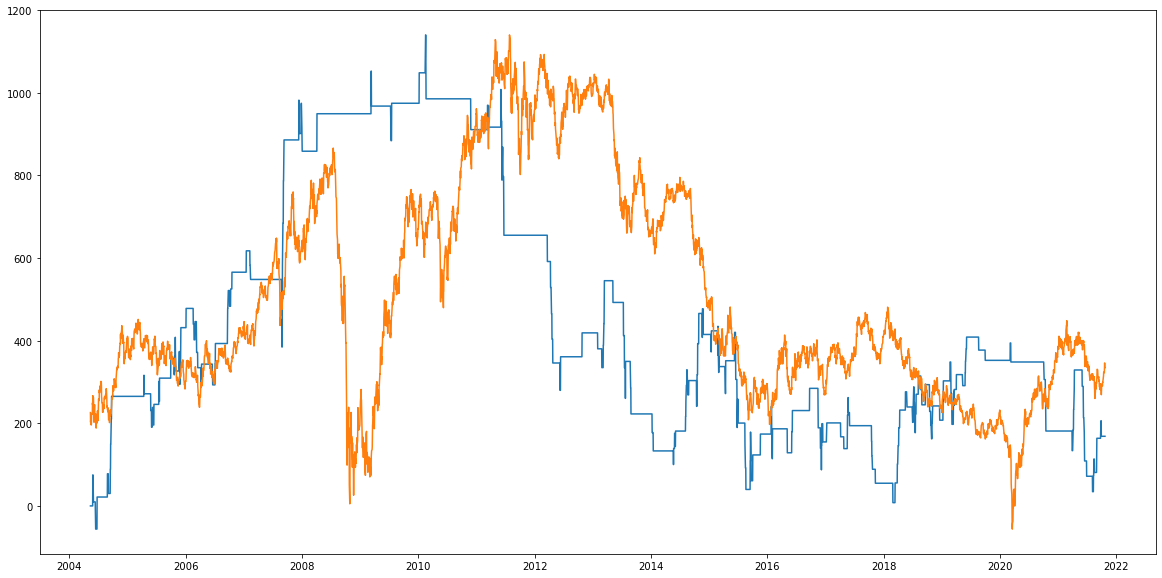

In [25]:
importlib.reload(tradestats)
from tradestats import *
# for i in [10,14,20,30,40]:
for i in [20]:
    atrperiod = 'atr'+str(i)+'atr_prev'
    fxs=runstats43(alltrades,'30',atrperiod,sl,tp,tsl,5,[223])

sub = calcandplot(alltrades,fxs)  

ii 0
           tradetype      1
                  sl    0.7
                  tp    0.7
                 tsl      0
       atr20atr_prev  -1000  0.015
 ma40SMAdiffseq_prev      1   1000
ma40SMAdiffdiff_prev  -1000   1000
     ma40SMAvs5_prev      0   1000
  ma5SMAdiffseq_prev      2   1000
 ma5SMAdiffdiff_prev  -1000      0
{'ii': 0, 'c': 592, 'cu': 331, 'cd': 261, 'p_sm': 4673.9805000000015, 'maxp': 4599.973000000004, 'maxd2': -812.5004999999978, 'mu': 0, 'md': 0, 'avgsl': 60.82356165540543, 'fx': '{}', 'r': 76.84489978538805, 'd': -13.358318353719596, 'rd2': 5.661501746768176}


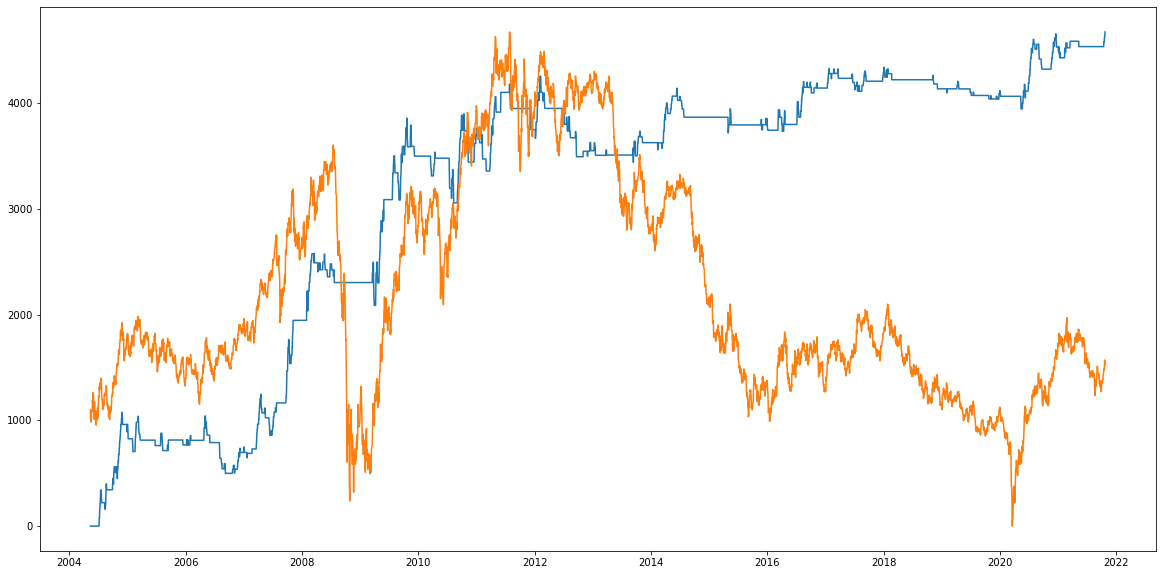

In [28]:
fxs = [
'{""tradetype"": [2, 1], ""sl"": [2, 0.7], ""tp"": [2, 0.7], ""tsl"": [2, 0], ""atr20atr_prev"": [3, -1000, 0.015], ""ma40SMAdiffseq_prev"": [0, 1, 1000], ""ma40SMAdiffdiff_prev"": [0, -1000, 1000], ""ma40SMAvs5_prev"": [3, 0, 1000], ""ma5SMAdiffseq_prev"": [3, 2, 1000], ""ma5SMAdiffdiff_prev"": [0, -1000, 0]}'
]    
sub = calcandplot(alltrades,fxs) 